In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and
covariance matrix. These parameters are analogous to the mean (average or "center") and variance (standard deviation, or "width," squared) of the one-dimensional normal distribution.

# 

Read the files labeled as 'sampleX.txt' using numpy or pandas and plot them.

In [161]:
import pandas as pd

In [119]:
#Read the files
sample_1 = pd.read_csv('sample1.txt', sep = '\t')
sample_2 = pd.read_csv('sample2.txt', sep = '\t')
sample_3 = pd.read_csv('sample3.txt', sep = '\t')

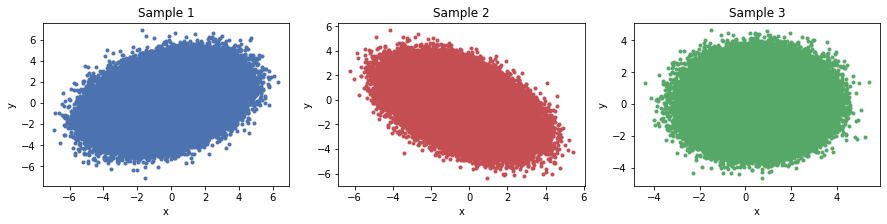

In [120]:
%matplotlib inline
plt.figure(figsize = (15, 3))

plt.subplot(131)
plt.plot(sample_1['x'], sample_1['y'], '.',  color = 'b')
plt.title('Sample 1')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(132)
plt.plot(sample_2['x'], sample_2['y'], '.',  color = 'r')
plt.title('Sample 2')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(133)
plt.plot(sample_3['x'], sample_3['y'], '.', color = 'g')
plt.title('Sample 3')
plt.xlabel('x')
plt.ylabel('y')

plt.show()


Determine whether each sample is correlated, anticorrelated or uncorrelated.

In [121]:
def det_cor(sample):
    corr = sample.corr()['x']['y']
    if corr > 0.1:
        print('this sample is correlated')
    elif corr < -0.1:
        print('this sample is anticorrelated')
    else:
        print('this sample is uncorrelated')
    print('the correlation of x and y in this sample is : ' + str(corr))

In [122]:
samples = [sample_1, sample_2, sample_3]
count = 0
for sample in samples:
    count += 1
    print('If we examine the sample_' + str(count) + ', we find that : ')
    det_cor(sample)
    print('\n')

If we examine the sample_1, we find that : 
this sample is correlated
the correlation of x and y in this sample is : 0.325751981894199


If we examine the sample_2, we find that : 
this sample is anticorrelated
the correlation of x and y in this sample is : -0.4723955183392059


If we examine the sample_3, we find that : 
this sample is uncorrelated
the correlation of x and y in this sample is : 0.03108027748010122




## 3d Plot
Plot the joint probability distribution of each sample in 3D. For this you can use 'plot_surface' found in matplotlib library.

If you want to plot using matplotlib, the codes below will come in handy. First line makes sure that your plots are interactive, second line provides color maps.

In [123]:
%matplotlib notebook
from matplotlib import cm

At the first step try to get the 2D histogram of your data. (Hint: beware of different sizes of arrays!)

<IPython.core.display.Javascript object>


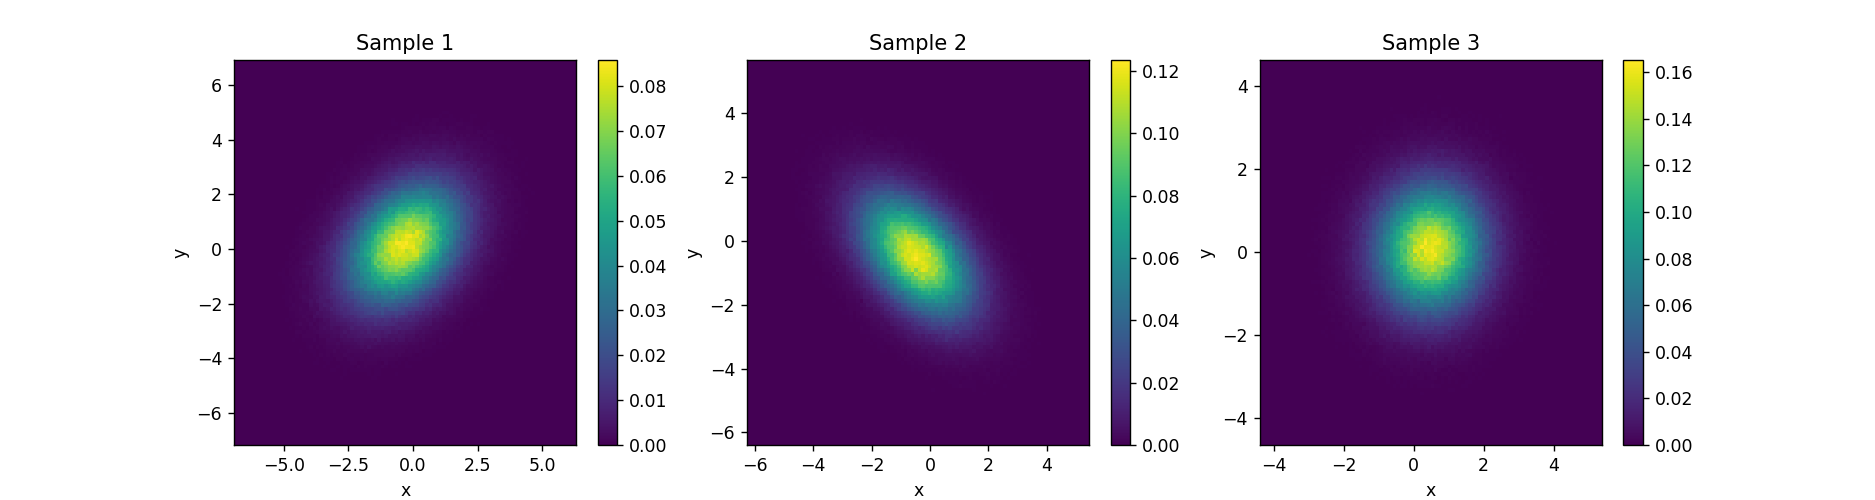

In [125]:
plt.figure(figsize = (15, 4))

plt.subplot(131)
plt.hist2d(sample_1['x'], sample_1['y'], bins = 100, density = True)
plt.title('Sample 1')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(132)
plt.hist2d(sample_2['x'], sample_2['y'], bins = 100, density = True)
plt.title('Sample 2')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(133)
plt.hist2d(sample_3['x'], sample_3['y'], bins = 100, density = True)
plt.title('Sample 3')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.show()

In [126]:
def get_2D_histogram(sample, bins):
    z, x, y = np.histogram2d(sample['x'], sample['y'], bins = bins,  density = True)
    x, y = np.meshgrid(x[:-1], y[:-1])
    return x, y, z

Now you can plot the 3D histogram:

<IPython.core.display.Javascript object>


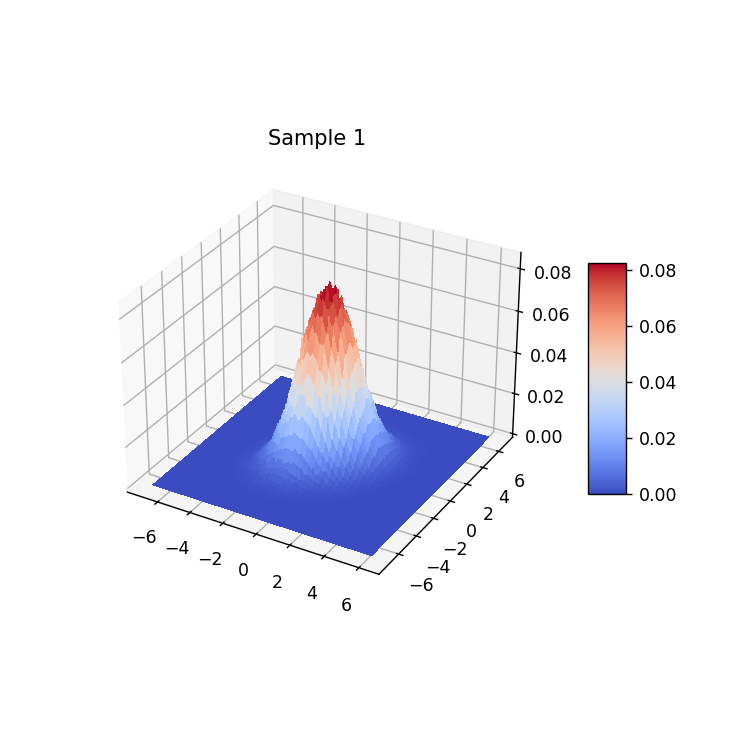

In [127]:
import matplotlib
matplotlib.rc_file_defaults()

fig = plt.figure(figsize = (6, 6))
ax = plt.axes(projection = '3d')

#Make data suitable to 3d plotting

x_1, y_1, z_1 = get_2D_histogram(sample_1, 100)

#Plot the surface.

surf_1 = ax.plot_surface(x_1, y_1, z_1, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

#Add a color bar which maps values to colors.

fig.colorbar(surf_1, shrink = 0.4, aspect = 6, pad = 0.08)

#Add a title
ax.set_title('Sample 1', fontsize = 12)

plt.show()

<IPython.core.display.Javascript object>


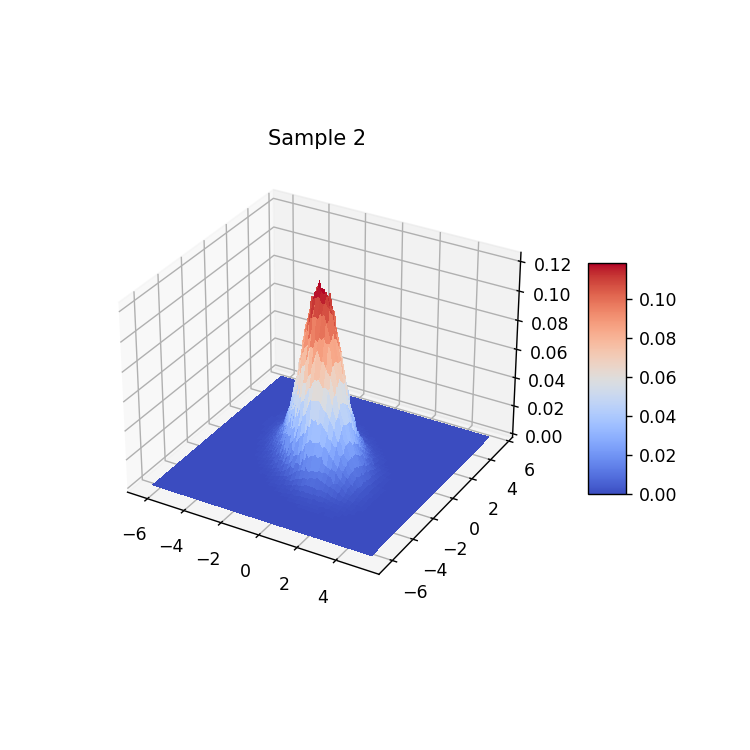

In [128]:
#Plot sample 2

fig = plt.figure(figsize = (6, 6))
ax = plt.axes(projection = '3d')

#Make data suitable to 3d plotting

x_2, y_2, z_2 = get_2D_histogram(sample_2, 100)

#Plot the surface.
surf_2 = ax.plot_surface(x_2, y_2, z_2, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

#Add a color bar which maps values to colors.
fig.colorbar(surf_2, shrink = 0.4, aspect = 6, pad = 0.08)

#Add a title
ax.set_title('Sample 2', fontsize = 12)

plt.show()

<IPython.core.display.Javascript object>


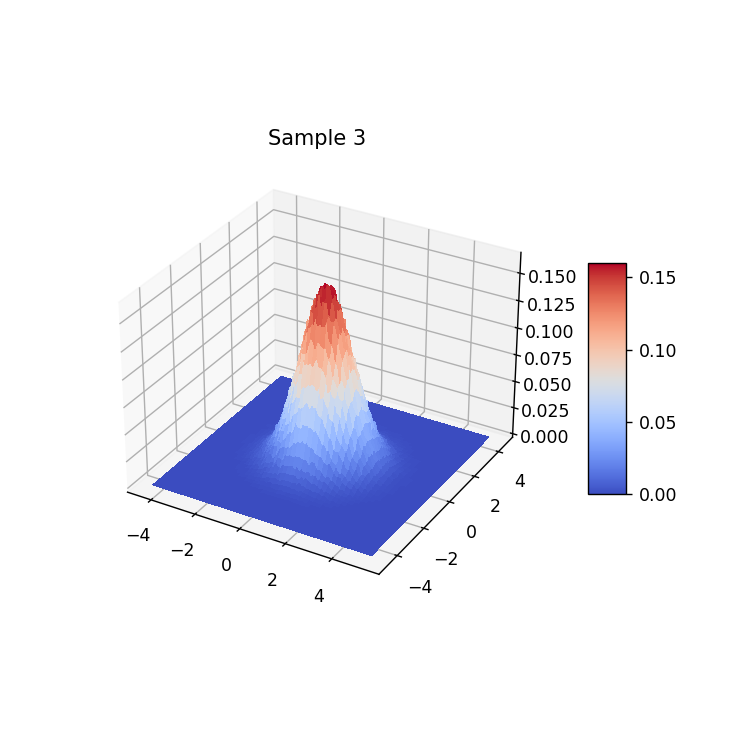

In [129]:
#Plot sample 3

fig = plt.figure(figsize = (6, 6))
ax = plt.axes(projection = '3d')

#Make data suitable to 3d plotting

x_3, y_3, z_3 = get_2D_histogram(sample_3, 100)

#Plot the surface.
surf_3 = ax.plot_surface(x_3, y_3, z_3, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

#Add a color bar which maps values to colors.
fig.colorbar(surf_3, shrink = 0.4, aspect = 6, pad = 0.08)

#Add a title
ax.set_title('Sample 3', fontsize = 12)

plt.show()


Using the calculated histograms, now write a code to calculate the marginalized PDFs along both axes and then plot them.

In [134]:
#Calculate marginalized distributions

z_1, x_1, y_1 = np.histogram2d(sample_1['x'], sample_1['y'], bins = 100,  normed = True)
x_1 = x_1[:-1]
x_marg_1 = np.sum(z_1, axis = 0)
y_1 = y_1[:-1]
y_marg_1 = np.sum(z_1, axis = 1)

z_2, x_2, y_2 = np.histogram2d(sample_2['x'], sample_2['y'], bins = 100,  normed = True)
x_2 = x_2[:-1]
x_marg_2 = np.sum(z_2, axis = 0)
y_2 = y_2[:-1]
y_marg_2 = np.sum(z_2, axis = 1)

z_3, x_3, y_3 = np.histogram2d(sample_3['x'], sample_3['y'], bins = 100,  normed = True)
x_3 = x_3[:-1]
x_marg_3 = np.sum(z_3, axis = 0)
y_3 = y_3[:-1]
y_marg_3 = np.sum(z_3, axis = 1)

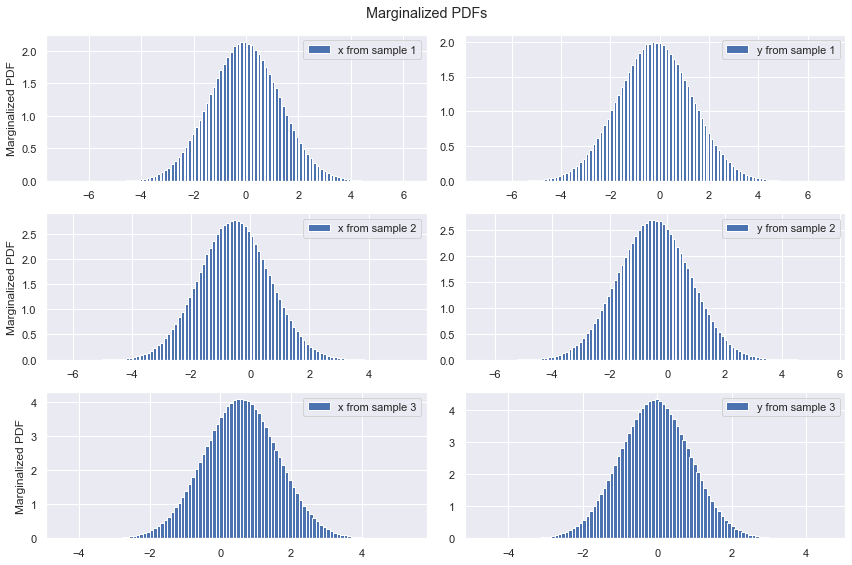

In [135]:
%matplotlib inline
sns.set()

plt.figure(figsize = (12, 8))
plt.suptitle('Marginalized PDFs')

plt.subplot(321)
plt.bar(x = x_1, height = x_marg_1, width = 0.1, label = 'x from sample 1')
plt.ylabel('Marginalized PDF')
plt.legend()

plt.subplot(322)
plt.bar(x = y_1, height = y_marg_1, width = 0.1, label = 'y from sample 1')
plt.legend()

plt.subplot(323)
plt.bar(x = x_2, height = x_marg_2, width = 0.1, label = 'x from sample 2')
plt.ylabel('Marginalized PDF')
plt.legend()

plt.subplot(324)
plt.bar(x = y_2, height = y_marg_2, width = 0.1, label = 'y from sample 2')
plt.legend()

plt.subplot(325)
plt.bar(x = x_3, height = x_marg_3, width = 0.1, label = 'x from sample 3')
plt.ylabel('Marginalized PDF')
plt.legend()

plt.subplot(326)
plt.bar(x = y_3, height = y_marg_3, width = 0.1, label = 'y from sample 3')
plt.legend()

plt.tight_layout()
plt.show()

## Extra example:

You can also combine the two steps above and plot the joint PDF and the marginalized ones altogether using seaborn.

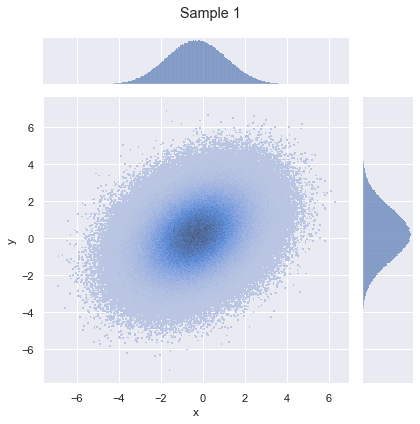

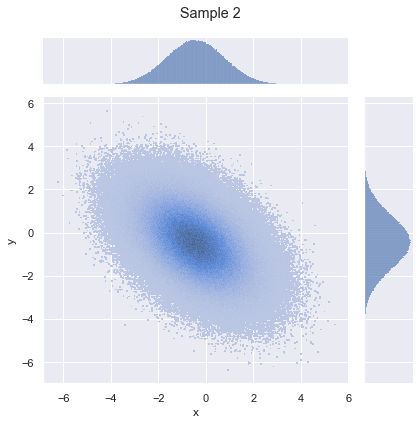

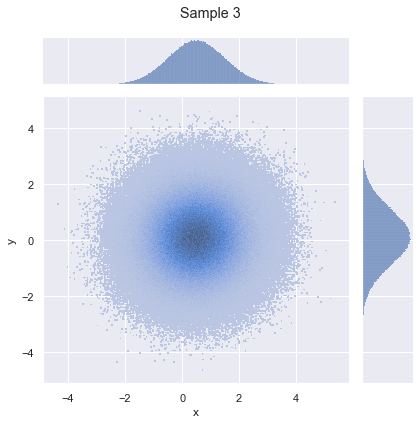

In [133]:
g1 = sns.jointplot(data = sample_1, x = 'x', y = 'y', kind = 'hist')
g1.fig.suptitle('Sample 1')
g1.fig.tight_layout()

g2 = sns.jointplot(data = sample_2, x = 'x', y = 'y', kind = 'hist')
g2.fig.suptitle('Sample 2')
g2.fig.tight_layout()

g3 = sns.jointplot(data = sample_3, x = 'x', y = 'y', kind = 'hist')
g3.fig.suptitle('Sample 3')
g3.fig.tight_layout()

plt.show()

## Contour Plots

Plot the contours of the datasets showing different values of contours.

<IPython.core.display.Javascript object>


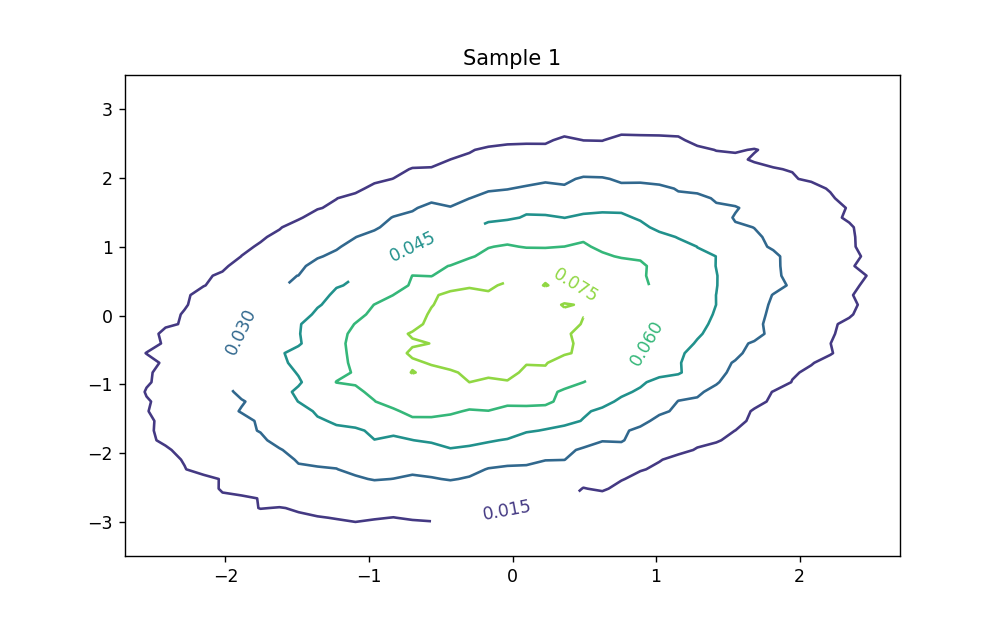

In [136]:
%matplotlib notebook
matplotlib.rc_file_defaults() #Use this line to revert back to matplotlib default style

#Plot the contour (sample 1)
plt.figure(figsize = (8, 5))
plt.title('Sample 1')
CS = plt.contour(x_1, y_1, z_1, levels = 5)
plt.clabel(CS, inline = 1, fontsize = 10)
plt.xlim([-2.7, 2.7])
plt.ylim([-3.5, 3.5])
plt.show()

<IPython.core.display.Javascript object>


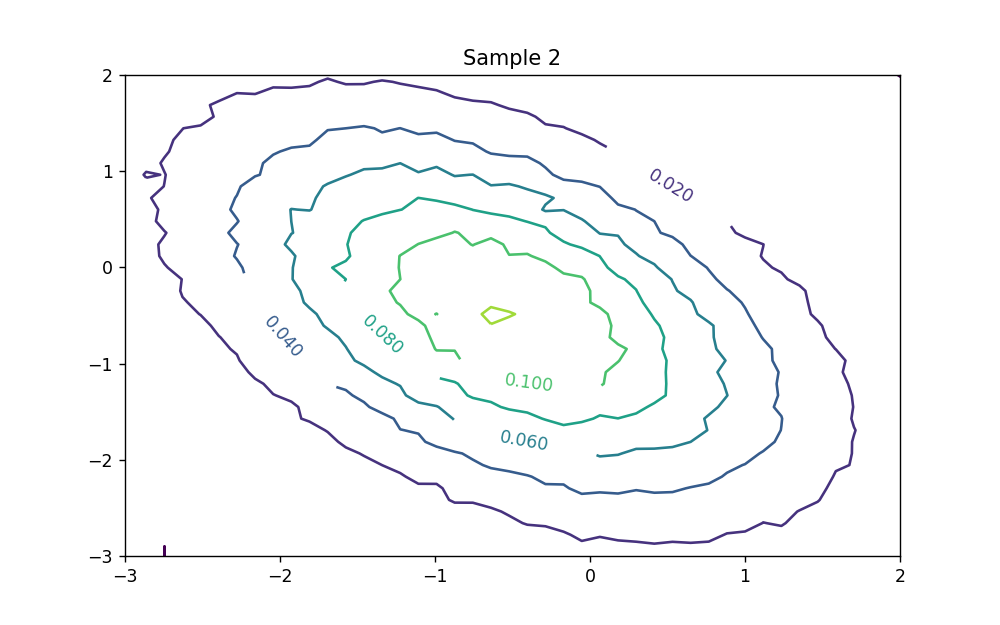

In [137]:
#Plot the contour (sample 2)
plt.figure(figsize = (8, 5))
plt.title('Sample 2')
CS = plt.contour(x_2, y_2, z_2, levels = 6)
plt.clabel(CS, inline = 1, fontsize = 10)
plt.xlim([-3, 2])
plt.ylim([-3, 2])
plt.show()

<IPython.core.display.Javascript object>


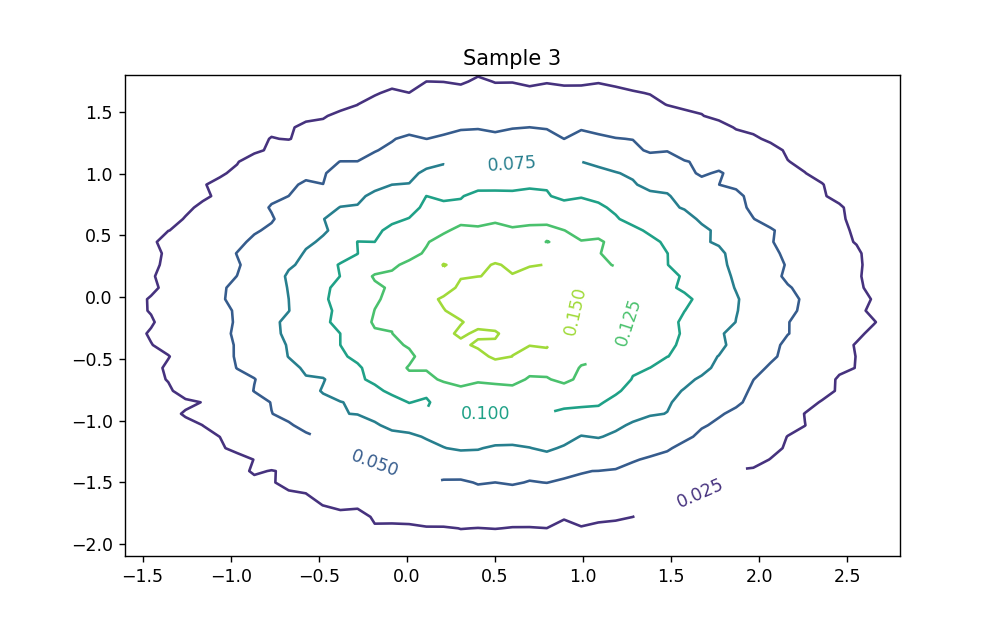

In [138]:
#Plot the contour (sample 3)
plt.figure(figsize = (8, 5))
plt.title('Sample 3')
CS = plt.contour(x_3, y_3, z_3, levels = 6)
plt.clabel(CS, inline = 1, fontsize = 10)
plt.xlim([-1.6, 2.8])
plt.ylim([-2.1, 1.8])
plt.show()


## 3 parts
In the multivariate case, a gaussian distribution is defined via a mean and a covrience matrix. Here the covarience matrix is the equivalant of varience in higher dimensions. To refresh your mind, take a look at the [Wikipedia page](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Notation_and_parameterization). A correlation matrix is very similiar but has some [subtle differences](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices). 

Now using those defenitions, find the **covariance** (part 1) and **correlation** (part 2) matrices for each distribution. Are they the same? why? (part 3)

(Hint 1: You may find scipy.stats useful)

(Hint 2: Study the lecture note titled: 'parameter estimation 7' once more)

(Hint 3: [This lecture note](https://pages.ucsd.edu/~rlevy/lign251/fall2007/lecture_4.pdf) may also be useful, althogh the codes aren't written in python)

## Part 1 (covariance)

In [139]:
cov_1 = sample_1.cov()
print('Sample 1 (Covariance):\n' + str(cov_1))

Sample 1 (Covariance):
          x         y
x  1.999031  0.651621
y  0.651621  2.001686


In [140]:
cov_2 = sample_1.cov()
print('Sample 2 (Covariance):\n' + str(cov_2))

Sample 2 (Covariance):
          x         y
x  1.999031  0.651621
y  0.651621  2.001686


In [141]:
cov_3 = sample_1.cov()
print('Sample 3 (Covariance):\n' + str(cov_3))

Sample 3 (Covariance):
          x         y
x  1.999031  0.651621
y  0.651621  2.001686


## Part 2 (correlation)

In [142]:
corr_1 = sample_1.corr()
print('Sample 1 (correlation):\n' + str(corr_1))

Sample 1 (correlation):
          x         y
x  1.000000  0.325752
y  0.325752  1.000000


In [143]:
corr_2 = sample_2.corr()
print('Sample 2 (correlation):\n' + str(corr_2))

Sample 2 (correlation):
          x         y
x  1.000000 -0.472396
y -0.472396  1.000000


In [144]:
corr_3 = sample_3.corr()
print('Sample 3 (correlation):\n' + str(corr_3))

Sample 3 (correlation):
         x        y
x  1.00000  0.03108
y  0.03108  1.00000


## Part 3

Covariance and correlation are two terms that are opposed and are both used in statistics and regression analysis.
Both of them measure the relationship and the dependency between two variables.
Covariance shows you how the two variables differ, whereas correlation shows you how the two variables are related.
You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.


## 2 parts

Now, only focus on the positievly correlated distribution. If the errors along both of the axes are huge, (as discussed in the lecture 'parameter estimation 7'), Is there a linear combination of the two parameters that can be well constrained? Discuss it (part 1).  Find the mode of the distribution (part 2)

In [145]:
#Code here


# Real World
let's apply this to real world data and using house price data. first import house_data.csv

In [162]:
df = pd.read_csv('House_price.csv')
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
429    430          20       RL        130.0    11457   Pave   NaN      IR1   
353    354          30       RM         60.0     8520   Pave   NaN      Reg   
108    109          50       RM         85.0     8500   Pave   NaN      Reg   
783    784          85       RL          NaN     9101   Pave   NaN      IR1   
1274  1275          50       RL         53.0     5362   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
429          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
353          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
108          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
783          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1274         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
429       3   2009        WD         Normal     175000  
353       5   2010        WD         Normal     105900  
108       8   2007        WD         Normal     115000  
783       7   2009        WD         Normal     165500  
1274     11   2007        WD         Normal     139000  

[5 rows x 81 columns]

you can see detail of your dataframe with the code below

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now select the columns of the train set with numerical data

In [164]:
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_num.sample(5)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
682    683         120          NaN     2887            6            5   
1380  1381          30         45.0     8212            3            3   
1401  1402          60         62.0     7415            6            5   
1196  1197          60         58.0    14054            7            5   
868    869          60          NaN    14762            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
682        1996          1997         0.0        1003  ...         307   
1380       1914          1950         0.0         203  ...           0   
1401       2004          2004         0.0         759  ...         100   
1196       2006          2006         0.0           0  ...         100   
868        1948          1950         0.0           0  ...         120   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
682             0              0          0            0         0        0   
1380            0             96          0            0         0        0   
1401           75              0          0            0         0        0   
1196           17              0          0            0         0        0   
868           144              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
682       11    2008     173000  
1380       6    2010      58500  
1401       4    2008     193000  
1196      11    2006     219210  
868        5    2006     169000  

[5 rows x 38 columns]

In [165]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Plot the distribution of all the numerical data

<IPython.core.display.Javascript object>


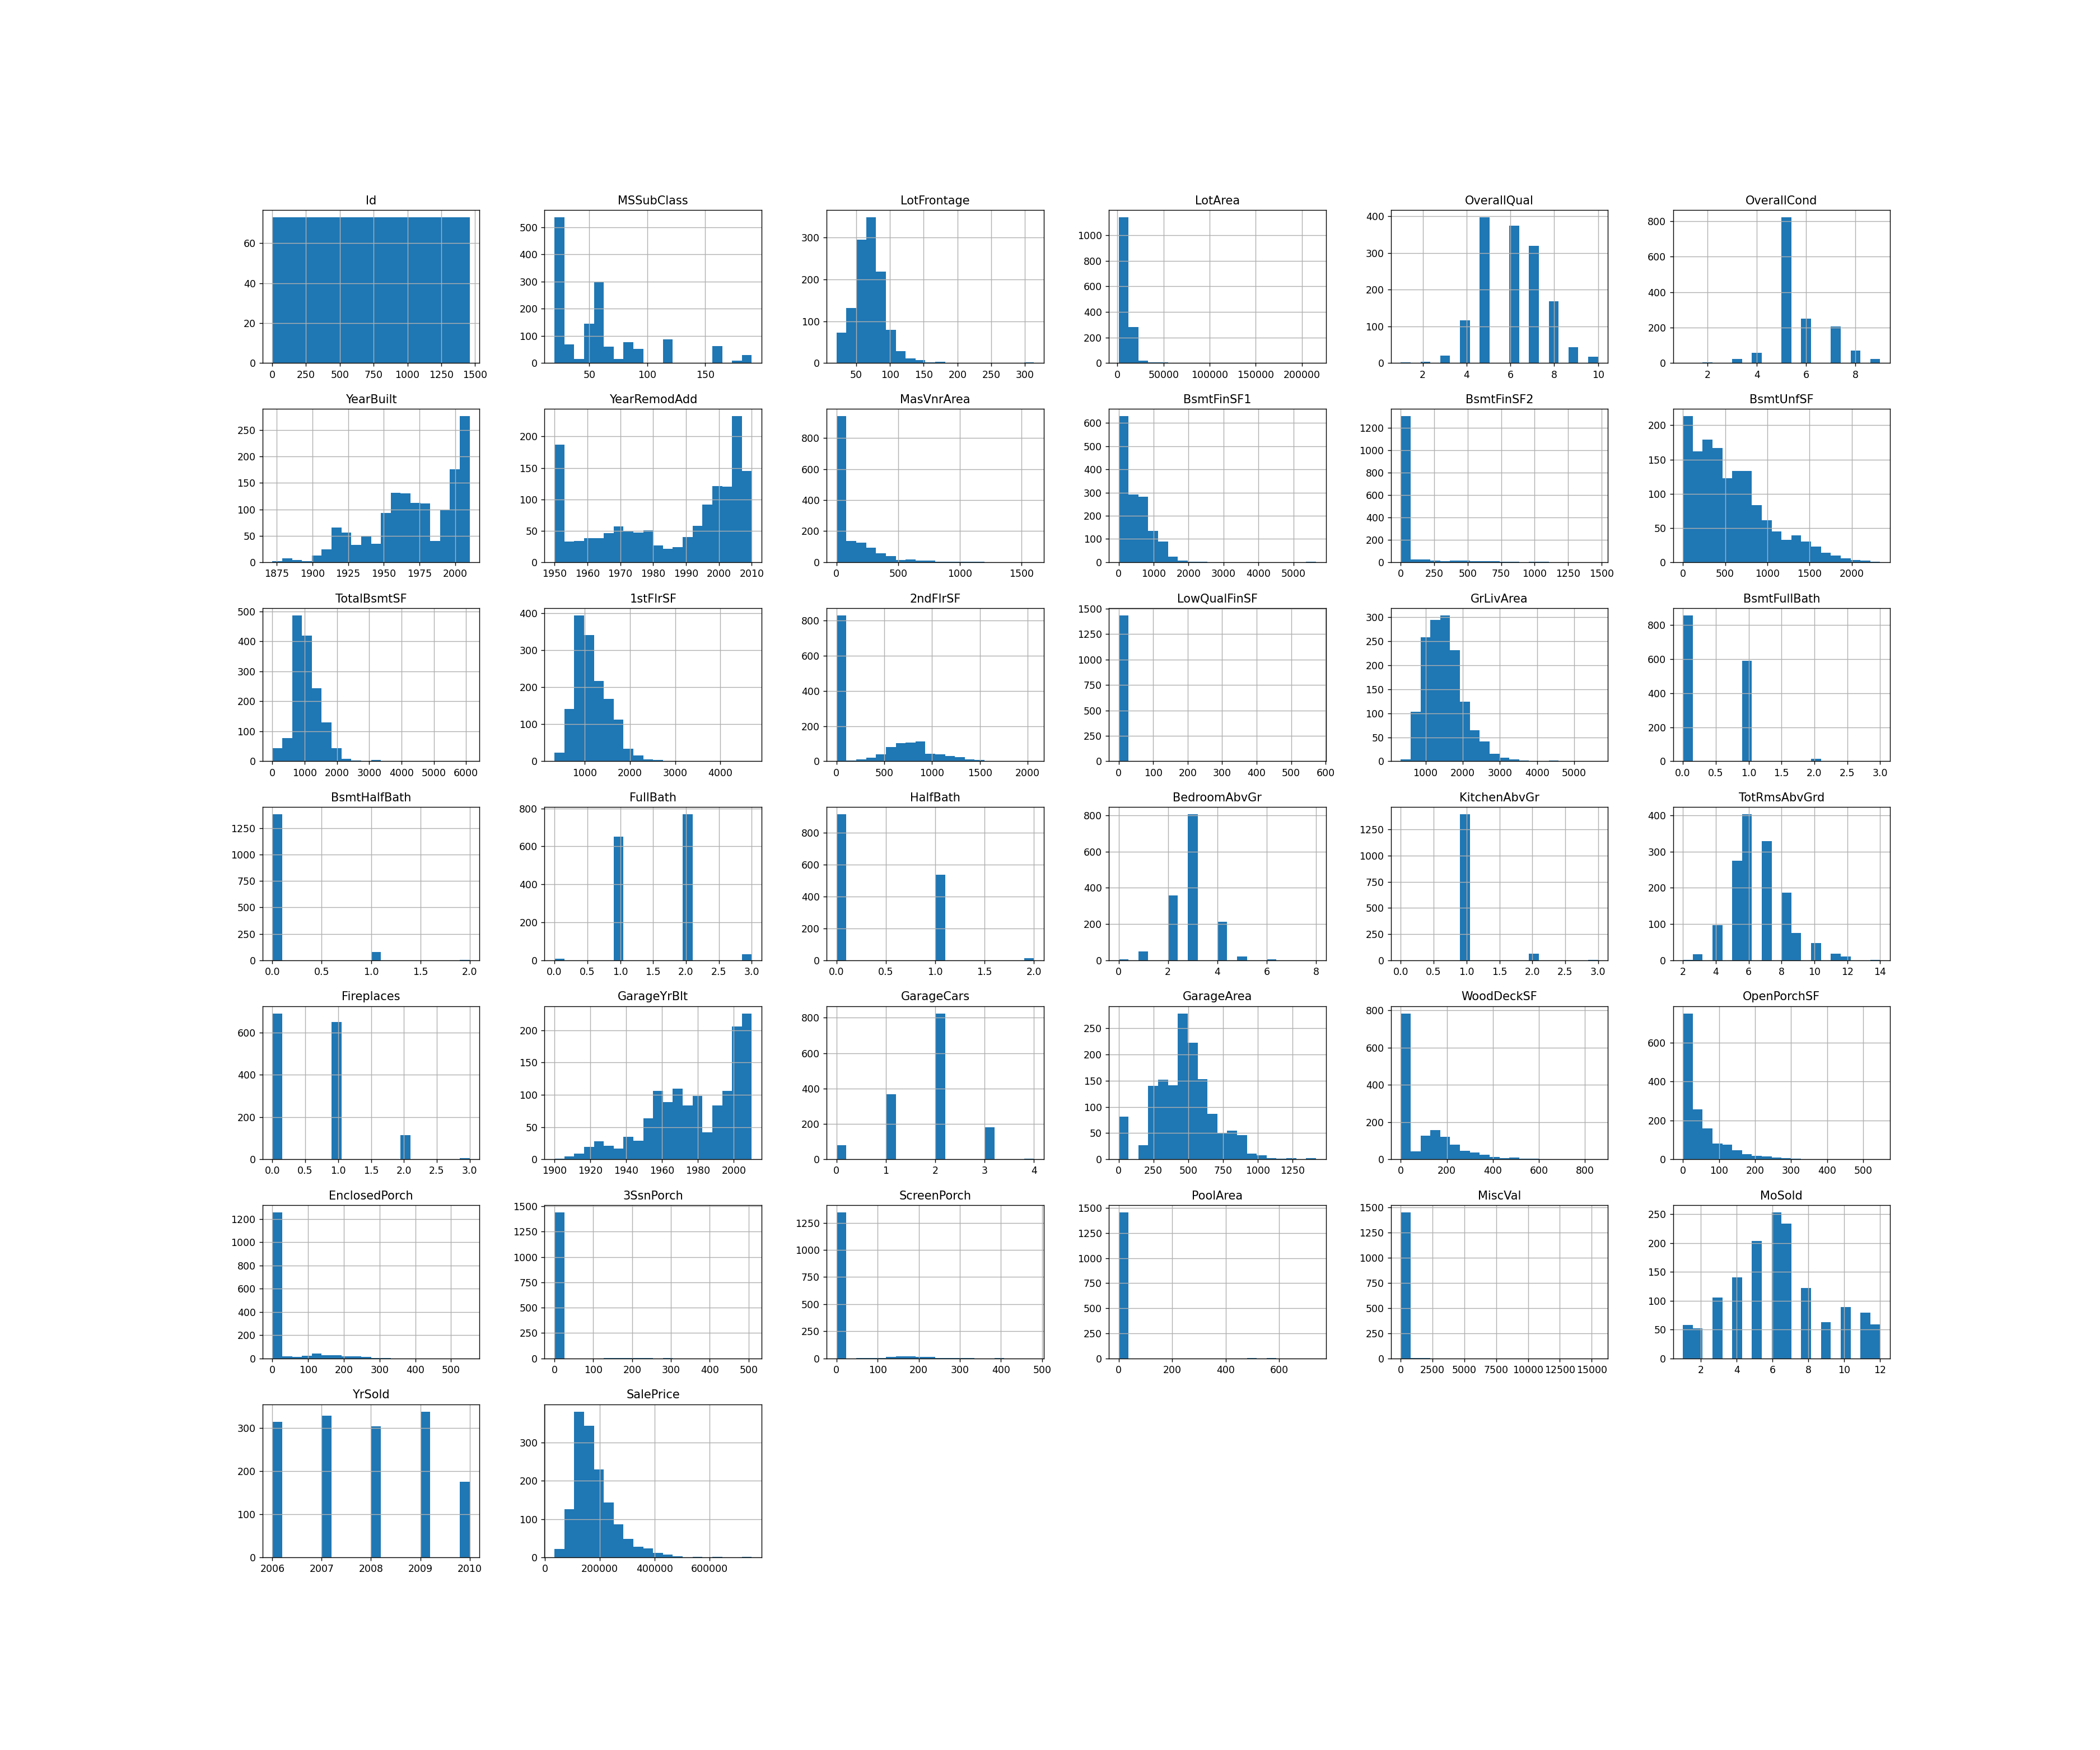

In [166]:
plot = df_num.hist(bins = 20, figsize = (30, 25))

plot Heatmap for all the remaining numerical data including the 'SalePrice'

<IPython.core.display.Javascript object>


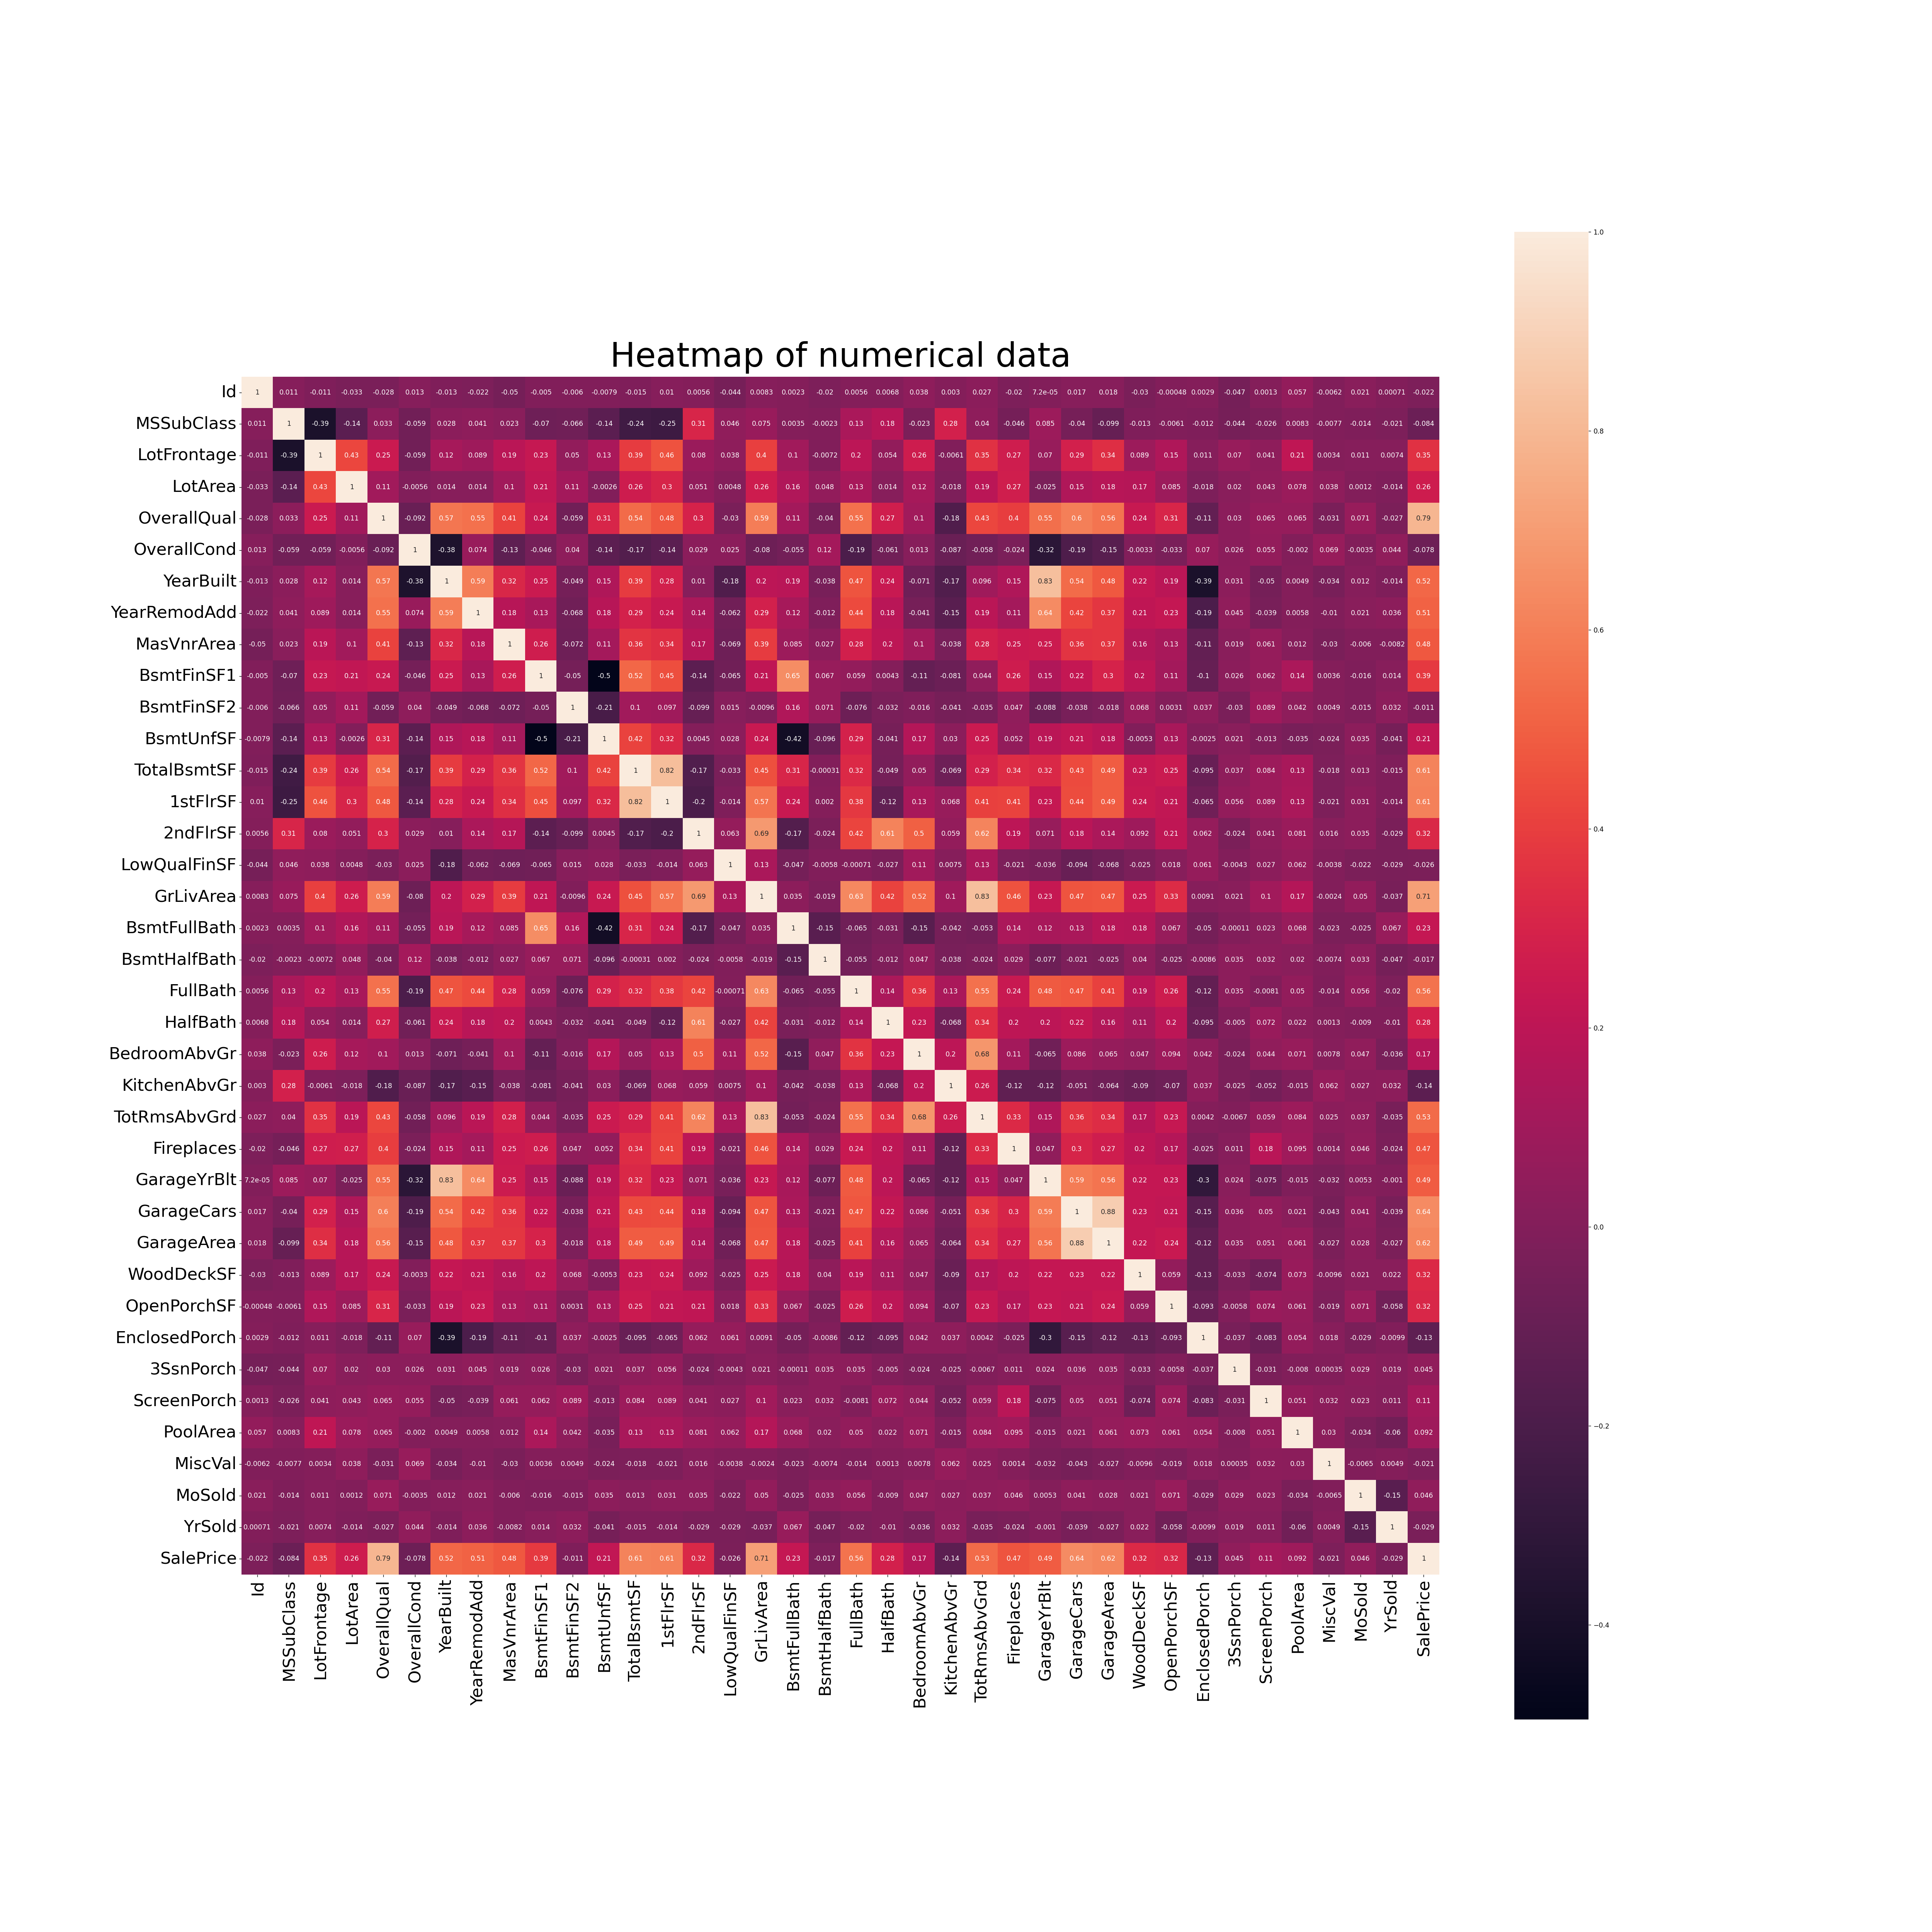

In [167]:
df_num_corr = df_num.corr()

plt.figure(figsize = (40, 40))
sns.heatmap(df_num_corr, square = True, annot = True)
plt.title('Heatmap of numerical data', size = 50, pad = 15)
plt.tick_params(labelsize = 25)
plt.show()

From the distribution of each numerical variables as well as the heatmap you can notice columns that are important and correlated (correlation higher than absolute 0.3) with our target variable 'SalePrice'. select columns where the correlation with 'SalePrice' is higher than |0.3|


In [152]:
correlated = df_num_corr['SalePrice'][:-1][np.abs(df_num_corr['SalePrice']) > 0.3].sort_values(ascending = False)
correlated

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

Now choose Features with high correlation (higher than 0.5) and plot the correlation of each feature with SalePrice

In [153]:
highly_correlated =  df_num_corr['SalePrice'][:-1][np.abs(df_num_corr['SalePrice']) > 0.5].sort_values(ascending = False)

In [154]:
highly_correlated.plot(kind = 'bar')
plt.show()

Check the NaN of dataframe set by ploting percent of missing values per column and plot the result

In [155]:
per_miss = df.isna().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent of missing': per_miss})
missing_values = missing_values[missing_values['percent of missing'] > 0]
missing_values

percent of missing
LotFrontage            17.739726
Alley                  93.767123
MasVnrType              0.547945
MasVnrArea              0.547945
BsmtQual                2.534247
BsmtCond                2.534247
BsmtExposure            2.602740
BsmtFinType1            2.534247
BsmtFinType2            2.602740
Electrical              0.068493
FireplaceQu            47.260274
GarageType              5.547945
GarageYrBlt             5.547945
GarageFinish            5.547945
GarageQual              5.547945
GarageCond              5.547945
PoolQC                 99.520548
Fence                  80.753425
MiscFeature            96.301370

<IPython.core.display.Javascript object>


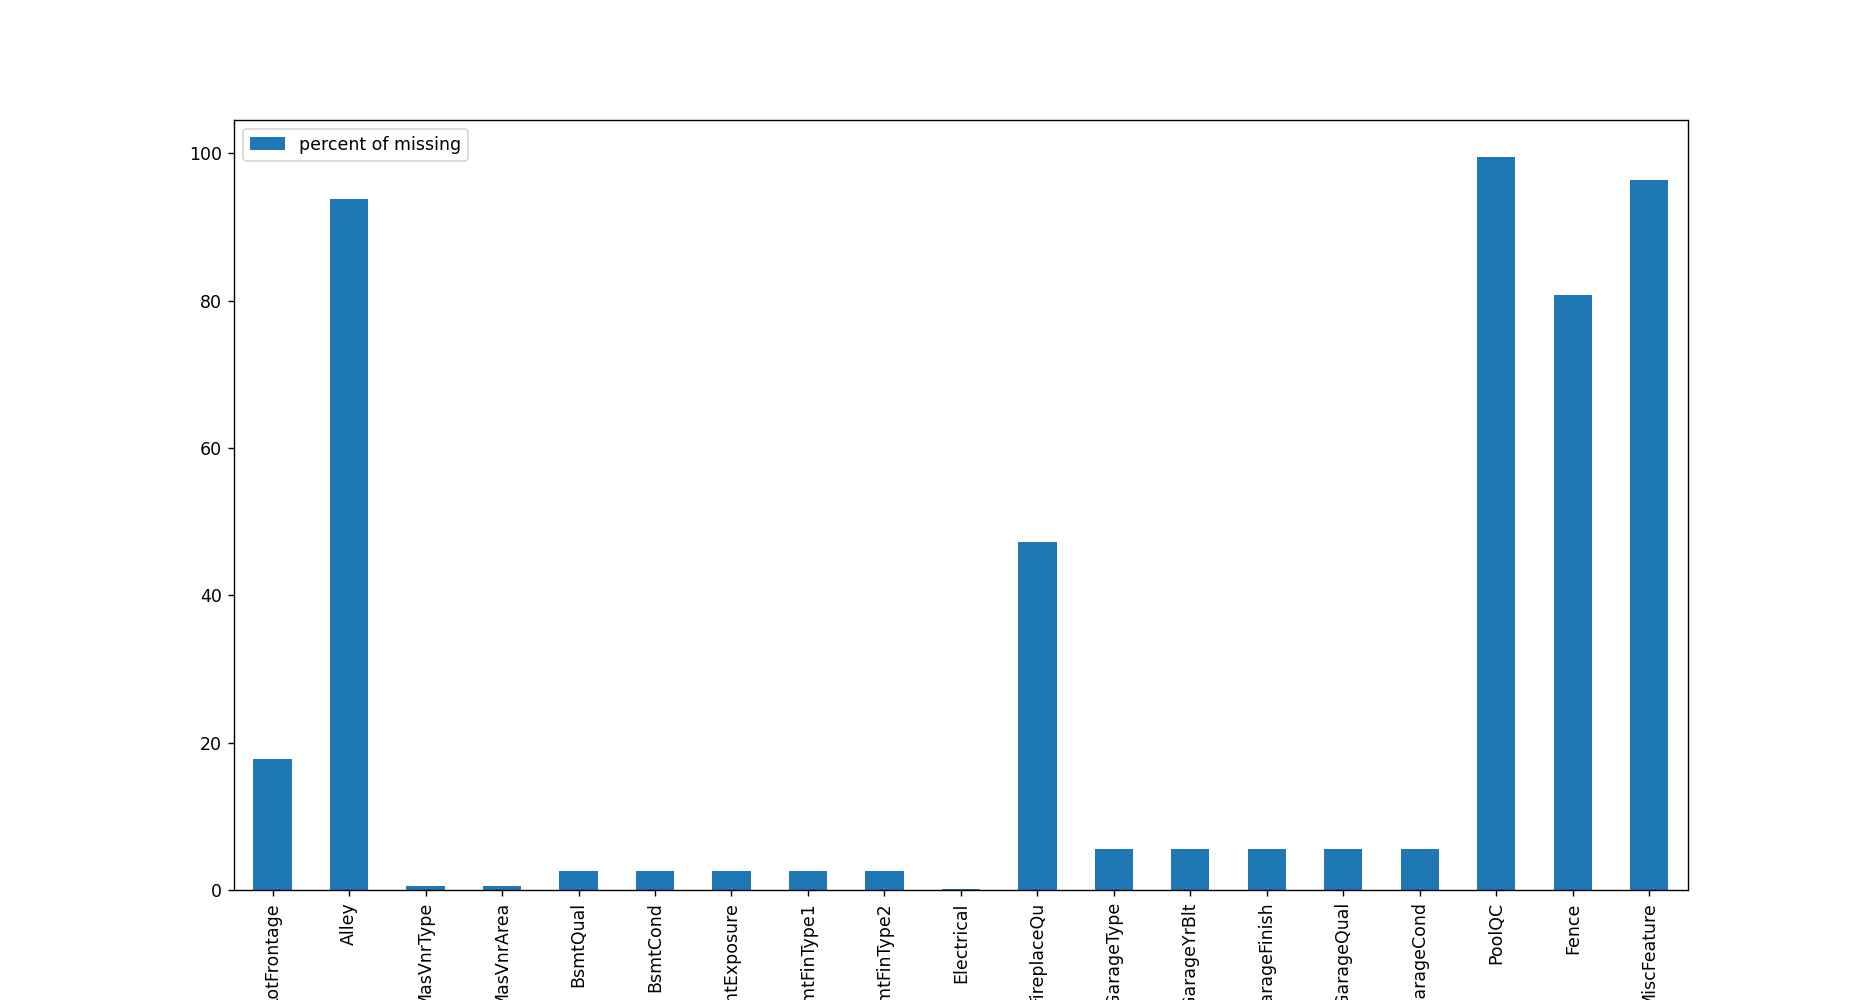

In [156]:
missing_values.plot(kind = 'bar', figsize = (15, 8))
plt.show()

in the last session I think Amirreza said that droping Nan cells is not suited in many projects cause
it can remove alots of information of your dataframe. ofcourse he is right and I would like to give a short introduction to the process of handling Nan cells which is called "Imputation". Data imputation is the substitution of estimated values for missing or inconsistent data items (fields). The substituted values are intended to create a data record that does not fail edits. here you can use Simple_

In [157]:
from sklearn.impute import SimpleImputer

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer you can check diffrent strategy 
my_imputer = SimpleImputer(strategy="median")
df_num_imputed = pd.DataFrame(my_imputer.fit_transform(df_num))
df_train_imputed.columns = df_train_num.columns

# Categorical features

## Explore and clean Categorical features

find all Catagorical columns. you can use the code for finding the numerical columns and just using 'object' for dtype.

In [158]:
categorical_columns = df.select_dtypes(include = 'object')
categorical_columns

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

Countplot for each of the categorical features in the train set

<IPython.core.display.Javascript object>


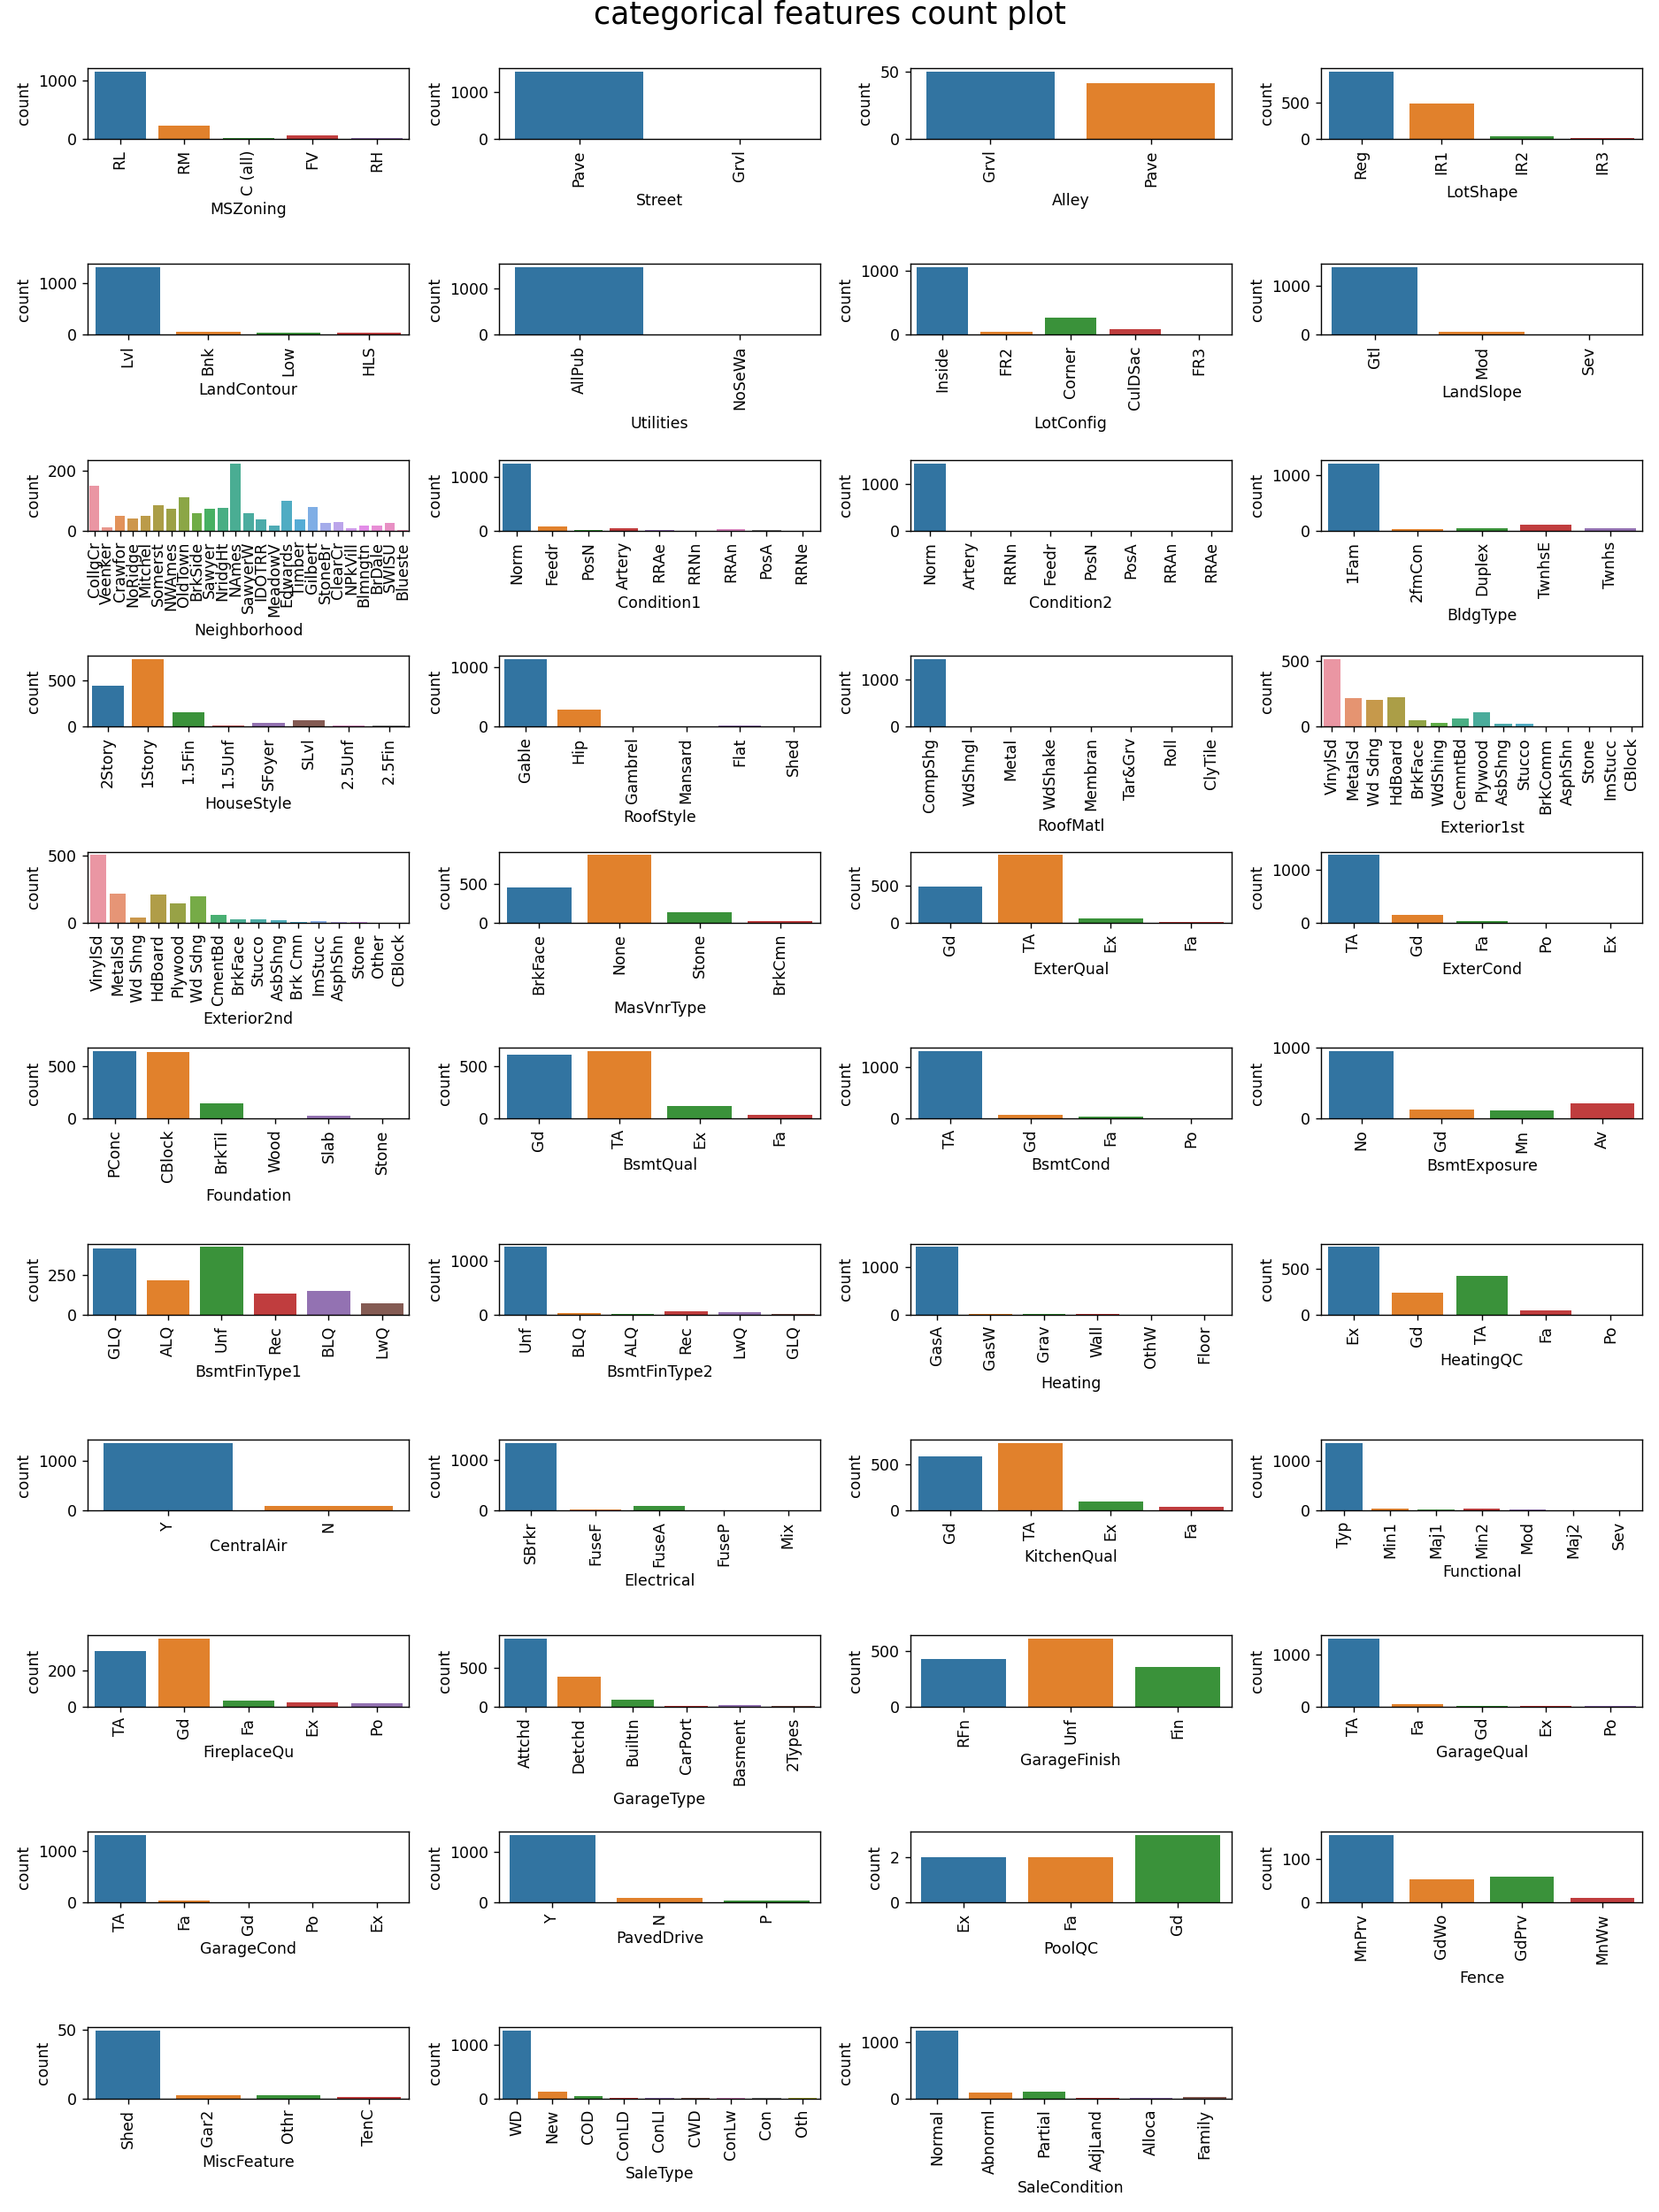

In [159]:
fig = plt.figure(figsize = (15, 20))
plt.suptitle('categorical features count plot', fontsize = 20, y = 1)

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(11, 4, i)
    sns.countplot(x = str(column), data = df)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()